# S&P 500 Project


This project was inspired by my desire to analyze a dataset using Python and my endless curiosity towards investing.

I decided to take a look at the S&P 500's daily closing price over the past 10 years.

I also analyzed select individual stocks within the S&P 500 to determine how they were impacted by the pandemic and assess their level of volatility. 

The aim is to use basic statistical analysis and data visualization to support my (un)wise decision to allocate 80% of my portfolio to *VOO*, an exchange-traded fund (ETF).


Note: The data was gathered [here](https://fred.stlouisfed.org) using a FRED (Federal Reserve Economic Data) API.



In [ ]:
%pip install fredapi > /dev/null

In [ ]:
%pip install python-decouple

Setting up the necessary libraries, configurations, and API key for the analysis and visualization.

The last line of code is to keep my API key private. For someone else to run this notebook, they would need to generate their own API key from FRED.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

from decouple import config
fred_key = config('API_KEY')

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Fred object creation

In [5]:
fred = Fred(api_key=fred_key)

## Retrieving S&P 500 closing price data

In [6]:
sp500_closing_prices = fred.get_series('SP500')

In [7]:
sp500_closing_prices

2013-09-12    1683.42
2013-09-13    1687.99
2013-09-16    1697.60
2013-09-17    1704.76
2013-09-18    1725.52
               ...   
2023-09-05    4496.83
2023-09-06    4465.48
2023-09-07    4451.14
2023-09-08    4457.49
2023-09-11    4487.46
Length: 2608, dtype: float64

It looks like we are able to access 10 years worth of daily closing prices.

## Creating a dataframe and time series plot

In [8]:
sp500_data = pd.DataFrame({
    'Date': sp500_closing_prices.index,
    'Closing_Price': sp500_closing_prices.values,
})

The Pandas dataframe has two columns, one for the indexed data and one for the corresponding closing price.

Below we have created a time series plot using Matplotlib.

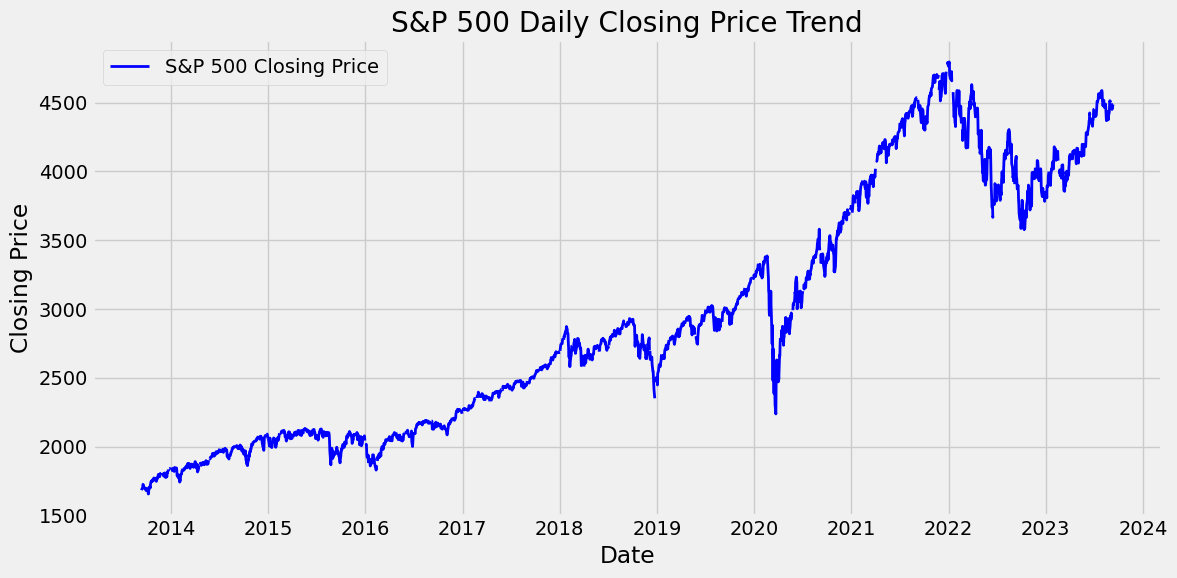

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], sp500_data['Closing_Price'], label='S&P 500 Closing Price', color='blue', linewidth=2)
plt.title('S&P 500 Daily Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights:

As we can see, S&P 500 closing prices exhibit a clear upward trend over the past decade. The outlier here is the beginning of 2020. Surely, this is strongly correlated to the onset of the Covid-19 pandemic.

We also see an extremely volatile 2022 characterized by sharp increases and an overall decline from the beginning of the year. This volatility may have been influenced by a range of factors that include economic uncertainty and shifts in investor sentiment.

It's important to note that while these historical trends can provide positive insights, the future performance of the S&P 500 carries a degree of uncertainty. 

In [ ]:
%pip install yfinance

Next, I thought it would be interesting to compare the impact of Covid-19 on various sectors by examining the daily closing prices of specific individual stocks.

 This analysis covers the period from 2019 to 2023.

In [ ]:
import yfinance as yf

## Creating a list for data retrieval

In [12]:
sp500_tickers = [
    'AAPL', 'AMZN', 'META',
    'PFE', 'DIS', 'NKE',
]

## Initializing a dictionary and downloading historical data for each ticker

In [13]:
sector_data = {}

for ticker in sp500_tickers:
    sector_data[ticker] = yf.download(ticker, start="2019-01-01", end="2023-01-01", progress=False)

In [14]:
for ticker, data in sector_data.items():
    print(f"Stock: {ticker}")
    print(data.head())
    print("================================")

Stock: AAPL
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.943253  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.163830  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.622253  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.542969  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.220520  164101200
Stock: AMZN
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  73.260002  77.667999  73.046501  76.956497  76.956497  159662000
2019-01-03  76.000504  76.900002  74.855499  75.014000  75.014000  139512000
2019-01-04  76.500000  79.699997  75.915497  78.769501  78.769501  183652000
2019-01-07  80.115501  81.727997  79.459503  81.4755

We will use the 'Adj Close' column for our analysis.

In [15]:
from itertools import cycle

## Creating plot for individual stocks

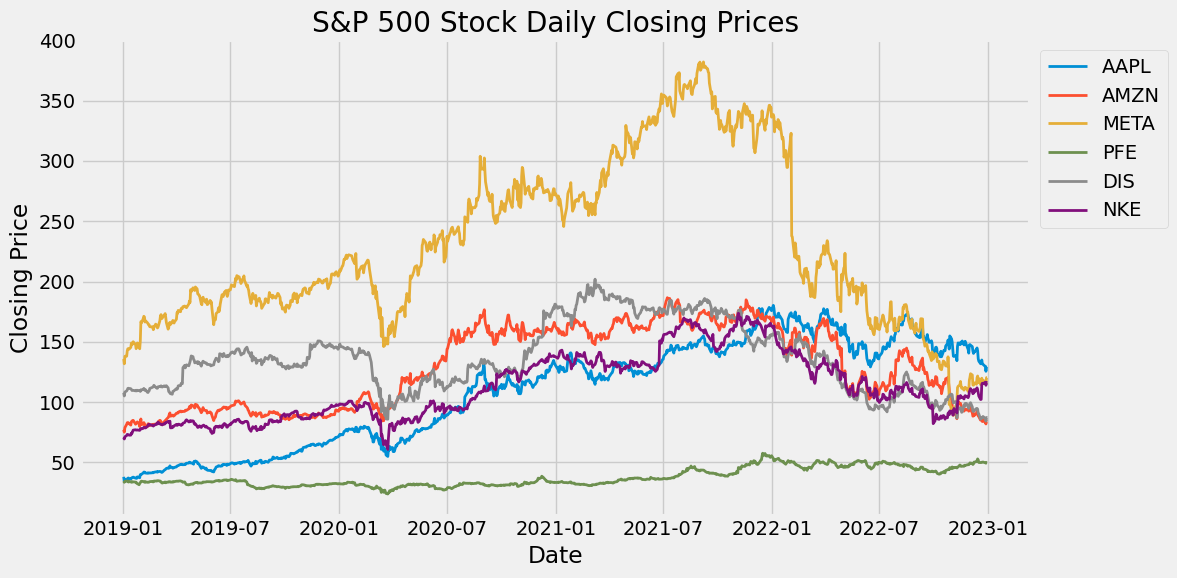

In [16]:
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

fig, ax = plt.subplots(figsize=(12, 6))

for ticker, data in sector_data.items():
    color = next(color_cycle)
    ax.plot(data.index, data['Adj Close'], label=ticker, linestyle='-', linewidth=2, color=color)

ax.set_title('S&P 500 Stock Daily Closing Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)

plt.tight_layout()
plt.show()

### Insights:

It's clear that the prices of individual stocks were negatively affected by the pandemic at the start of 2020, but they showed signs of recovery over the next two years.

However, 2022 was a challenging year for every stock we included. This aligns with the overall performance of the S&P500 during this period. 

Meta, in particular, experienced a rollercoaster year in 2022. Let's continue by exploring the relative volatility of these stocks using their standard deviation over the same period of time.

## Calculating daily returns for each stock

In [17]:
returns_data = {}
for ticker, data in sector_data.items():
    returns_data[ticker] = data['Adj Close'].pct_change()

## Calculating standard deviation of daily returns

In [18]:
volatility_data = {}
for ticker, returns in returns_data.items():
    volatility_data[ticker] = returns.std()

In [19]:
volatility_df = pd.DataFrame.from_dict(volatility_data, orient='index', columns=['Volatility'])

## Order and plot

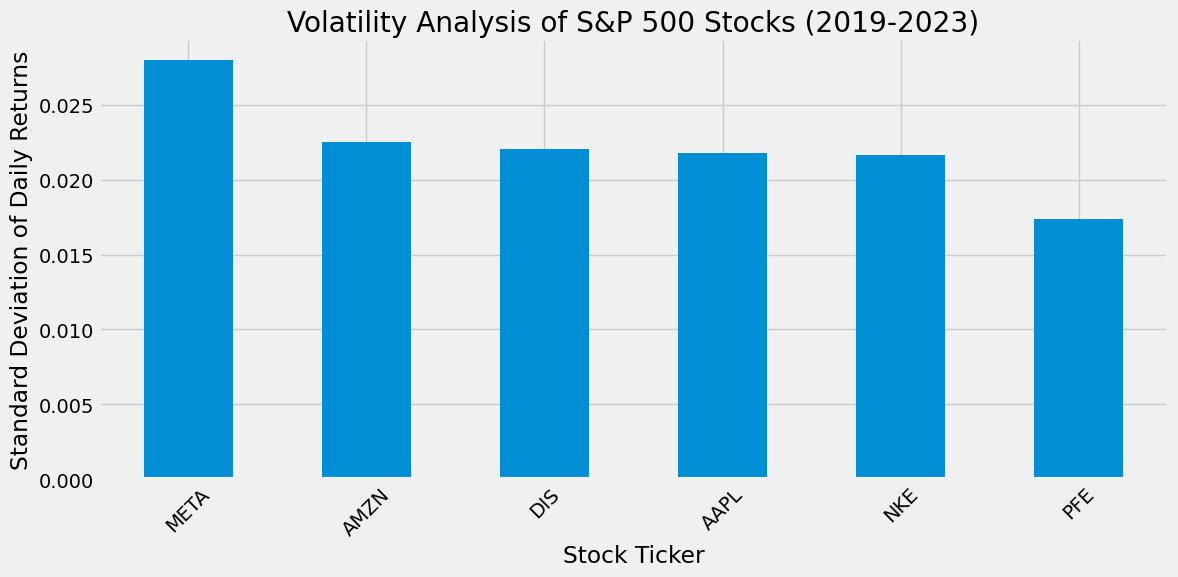

In [20]:
volatility_df = volatility_df.sort_values(by='Volatility', ascending=False)
volatility_df.plot(kind='bar', figsize=(12, 6), legend=False)
 
plt.title('Volatility Analysis of S&P 500 Stocks (2019-2023)')
plt.xlabel('Stock Ticker')
plt.ylabel('Standard Deviation of Daily Returns')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### Insights:

Meta exhibited the highest volatility since 2019, while surprisingly, Pfizer emerged as the least volatile stock among the group. 

This might be attributed to Pfizer's comparatively lower initial stock price.

An interesting note here is that Facebook [officially](https://about.fb.com/news/2021/10/facebook-company-is-now-meta/) announced its rebranding to "Meta" on October 28, 2021 leading one to wonder if this is the reason for the high volatility during this four year span.

Further analysis is needed to discover the precise relationship between the rebranding and the market volatility, but it remains an intriguing factor to consider in understanding Meta's recent market dynamics.

## Creating a zoomable candlestick chart

Lastly, I wanted to create an interactive visualization that allowed for more granular investigation into the S&P 500's daily closing prcie over the past 10 years.

In [21]:
fig = px.line(sp500_data, x='Date', y='Closing_Price', title='Simplified Candlestick-Style Chart for S&P 500 Closing Prices')
fig.update_traces(line=dict(color='blue', width=2))
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Closing Price',
    xaxis_rangeslider_visible=True, 
)
fig.show()